Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [23]:
import detective.core as detective
import detective.helpers as helpers
from fbprophet import Prophet
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load from a local db, we just need the path

In [2]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

Alternatively, to load from a cloud database we load from a json file containing the url as the url contains our credentials and we want to lkeep these a secret. To learn how the Google CLoud SQL recorder can be setup checkout https://github.com/robmarkcole/HASS-Google-Cloud-SQL

In [3]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

## Load the db data

We use the DataParser class to load data from the database. This class performs the SQL queries and parses the returned data. The class holds the master pandas dataframe master_df.

In [4]:
%%time
parser = detective.DataParser(DB_URL)

Querying the database, this could take a while
CPU times: user 5.36 s, sys: 1.12 s, total: 6.49 s
Wall time: 40.1 s


Lets create an object holding the numerical sensor

In [5]:
sensors_num = detective.NumericalSensors(parser.master_df)

We can access the list of sensor entities using the list_sensors attribute

In [6]:
sensors_num.entities[0:10]

['sensor.bme680humidity',
 'sensor.bme680pressure',
 'sensor.next_train_in',
 'sensor.living_room_temperature',
 'sensor.darksky_sensor_temperature',
 'sensor.mean_temperature',
 'sensor.bme680temperature',
 'sensor.bedroom_temperature',
 'sensor.next_train_to_wim',
 'sensor.network_up']

Now lets look at the dataframe

In [7]:
sensors_num.data.head()

entity,sensor.bayes_probability,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.cpu_load_total,sensor.darksky_sensor_precip_probability,...,sensor.mean_temperature,sensor.memory_usage_real,sensor.network_up,sensor.next_train_in,sensor.next_train_to_wim,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.time_in_bed,sensor.volume_used_volume_1,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2018-01-23 07:16:58.762162,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,7.16,19.7,38.0
2018-01-23 07:16:58.910505,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,1.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:16:59.094701,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.256479,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0
2018-01-23 07:17:04.484865,0.2,18.19,1.0,18.0,7549489.0,45.957,1016.85,22.07,2.0,0.0,...,18.12,53.0,5.5,1.0,28.0,100.0,10.79,0.00,19.7,38.0


Lets now check for correlations in the data using the all_corrs() method

In [8]:
corrs = sensors_num.correlations()

In [9]:
corrs[(corrs['value'] > 0.5) | (corrs['value'] < -0.5)]

,value
sensor.next_train_to_wim-sensor.next_train_in,0.981555
sensor.bedroom_temperature-sensor.mean_temperature,0.841950
sensor.hall_temperature-sensor.mean_temperature,0.789974
sensor.living_room_temperature-sensor.mean_temperature,0.783398
sensor.blink_blink_camera_percy_temperature-sensor.mean_temperature,0.777675
sensor.bedroom_temperature-sensor.living_room_temperature,0.714333
sensor.blink_blink_camera_percy_temperature-sensor.hall_temperature,0.616543
sensor.bedroom_temperature-sensor.blink_blink_camera_percy_temperature,0.548831
sensor.home_to_waterloo-sensor.robins_iphone_battery_level,-0.531670
sensor.darksky_sensor_temperature-sensor.mean_temperature,-0.564483


Unsurprisingly the mean temperature is strongly correlated with all of the temperature sensors. 

Interestingly my iphone battery level is somewhat inversely correlated with the travel time from home to waterloo, which gets longer late at night when my battery level is more likely to be low. 

#### Plot sensor data
Convenience to plot a sensor data.

In [10]:
to_plot = ['sensor.living_room_temperature',
           'sensor.bedroom_temperature',
           'sensor.darksky_sensor_temperature']

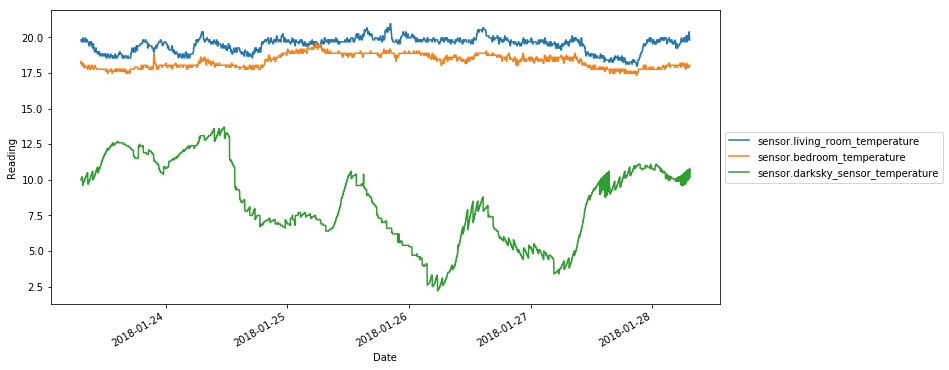

In [11]:
fig = sensors_num.plot(to_plot)

#### Pairplot
A seaborn pair plot to show correlations.

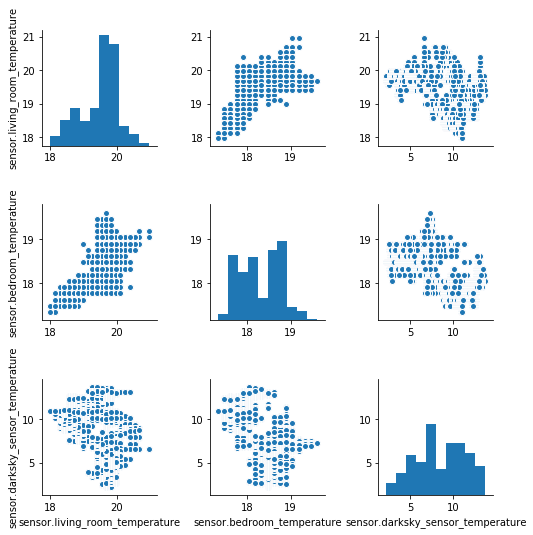

In [12]:
sns.pairplot(sensors_num.data[to_plot]);

## Binary sensors
Class for handling binary sensors with on/off states.

In [13]:
class BinarySensors():
    """
    Class handling binary sensor data.
    """
    def __init__(self, master_df):
        # Extract all the numerical sensors
        binary_df = master_df.query(
            'domain == "binary_sensor"')
        
        # List of sensors
        entities = list(
            binary_df.index.get_level_values('entity').unique())
        self._entities = entities
        
        # Binarise
        binary_df['state'] = binary_df['state'].apply(
            lambda x: helpers.binary_state(x)) 
        
        # Pivot
        binary_df = binary_df.pivot_table(
            index='last_changed', columns='entity', values='state')
        
        # Index to datetime
        binary_df.index = pd.to_datetime(binary_df.index)
        binary_df.index = binary_df.index.tz_localize(None)

        self._binary_df = binary_df.copy()
        return

    @property
    def data(self):
        """Return the dataframe holding numerical sensor data."""
        return self._binary_df
    
    @property
    def entities(self):
        """Return the list of sensors entities."""
        return self._entities

In [24]:
sensors_binary = BinarySensors(parser.master_df)

In [25]:
sensors_binary.data.head()

entity,binary_sensor.blink_armed_status,binary_sensor.blink_blink_camera_percy_motion_enabled,binary_sensor.devices_home,binary_sensor.doorbell,binary_sensor.elgato_door,binary_sensor.fibaro_leak,binary_sensor.in_bed_bayesian,binary_sensor.late_night_sensor,binary_sensor.living_room_nest_protect_online,binary_sensor.macbook,binary_sensor.motion_at_home,binary_sensor.wipy_water_monitor,binary_sensor.workday_sensor
last_changed,,,,,,,,,,,,,
2017-12-25 07:30:00.472937,None,None,None,None,None,None,None,None,None,None,False,None,None
2017-12-25 07:30:00.474791,None,None,None,None,None,None,None,False,None,None,None,None,None
2017-12-25 07:30:00.476154,None,None,False,None,None,None,None,None,None,None,None,None,None
2017-12-25 07:30:00.477496,None,None,None,None,None,None,False,None,None,None,None,None,None
2017-12-25 07:30:00.728927,None,None,None,None,None,None,None,None,None,None,None,False,None


In [26]:
sensors_binary.entities

['binary_sensor.motion_at_home',
 'binary_sensor.in_bed_bayesian',
 'binary_sensor.elgato_door',
 'binary_sensor.late_night_sensor',
 'binary_sensor.devices_home',
 'binary_sensor.wipy_water_monitor',
 'binary_sensor.fibaro_leak',
 'binary_sensor.macbook',
 'binary_sensor.workday_sensor',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.blink_armed_status',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.doorbell']

#### Prediction with prophet
Lets do some forecasting using prophet. We require a single sensor which is a pandas data series object.

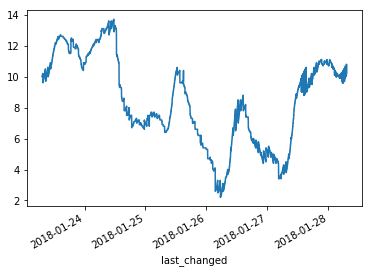

In [17]:
sensor_ds = sensors_num.data['sensor.darksky_sensor_temperature']
sensor_ds.plot()

In [18]:
pred1 = detective.Prediction(sensor_ds)

Create a prophet model

In [19]:
print(pred1.prophet_model.__doc__)


        Make a propet model for the given sensor for the number of periods.

        Parameters
        ----------

        periods : int
            The default period is 0 (no forecast)

        freq : str
            Unit of time, defaults to seconds.
        


In [20]:
%%time
pred1.prophet_model(periods=5, freq='H')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 38.1 s, sys: 791 ms, total: 38.9 s
Wall time: 38.8 s


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


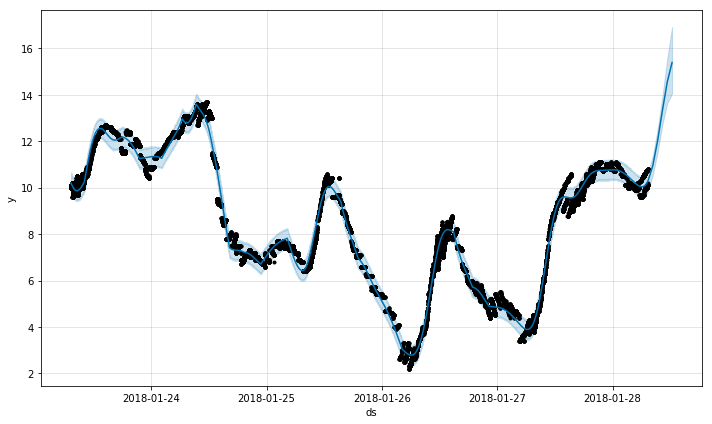

In [21]:
pred1.plot_future()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


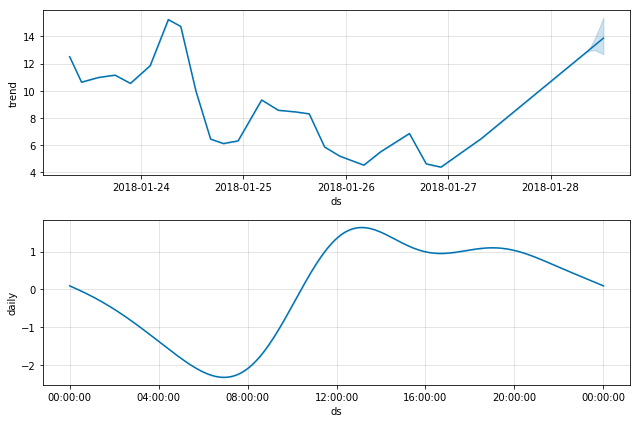

In [22]:
pred1.plot_components()

Clearly the daily trend is for the warmest temperatures at early afternoon